In [1]:
# importing the required modules
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
# importing the dataset(i,e all the images from directory)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Arecanut_dataset/train/",
shuffle=True,
# image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 4600 files belonging to 3 classes.


In [4]:
#create a variable and assign all our image folders into it
class_names = dataset.class_names #folder name are our class name
class_names

['Healthy_Nut', 'Mahali_Koleroga', 'Stem_bleeding']

In [5]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1]


In [ ]:
len(dataset)

144

In [7]:
dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [8]:
#explore the dataset
#dataset.take(1) takes the first one sample
#dataset.take(10) takes the first ten sample
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0]) # get the first image data in tensor

#image_batch: Represents a batch of images from the dataset.
#label_batch: Corresponds to the labels associated with the images in the batch.
#The printed statement (print(image_batch[0])) outputs the data tensor of the first image in the batch

tf.Tensor(
[[[129.61914  129.68164   75.49414 ]
  [135.76562  134.82715   77.64258 ]
  [122.87109  123.978516  68.96094 ]
  ...
  [ 44.81836   90.47949   56.624023]
  [ 52.95215   97.40625   64.40625 ]
  [ 53.03711   94.09863   62.078125]]

 [[133.84375  133.94922   79.75    ]
  [129.96582  128.98145   73.012695]
  [107.390625 108.        58.973633]
  ...
  [ 81.96973  120.97461   86.271484]
  [ 88.109375 128.06543   93.87207 ]
  [ 90.21875  125.32715   93.25    ]]

 [[126.555664 130.08691   75.65625 ]
  [115.09375  114.734375  64.546875]
  [ 88.65723   87.92285   46.85742 ]
  ...
  [119.55664  150.11914  112.759766]
  [126.13574  158.69824  123.33887 ]
  [128.88379  157.3125   125.53125 ]]

 ...

 [[195.02051  212.89551  198.95801 ]
  [187.27734  203.27734  190.27734 ]
  [197.98633  211.98633  198.98633 ]
  ...
  [113.427734 137.42773  121.427734]
  [ 91.978516 115.978516  99.978516]
  [112.67676  136.67676  120.67676 ]]

 [[184.65918  202.53418  188.59668 ]
  [182.31152  198.31152  1

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())# convert tensor into numpy
    #3D matrix array

[[[205.73438 201.73438 190.73438]
  [205.      201.      190.     ]
  [203.0625  199.0625  188.0625 ]
  ...
  [195.11719 188.11719 178.11719]
  [194.      190.      179.     ]
  [195.3125  188.3125  178.3125 ]]

 [[201.1875  197.1875  186.1875 ]
  [206.      202.      191.     ]
  [204.      200.      189.     ]
  ...
  [196.60156 189.60156 179.60156]
  [194.4375  190.4375  179.4375 ]
  [192.88281 185.88281 175.88281]]

 [[205.1875  201.1875  190.1875 ]
  [206.83594 202.83594 191.83594]
  [204.      200.      189.     ]
  ...
  [197.      193.      181.     ]
  [190.      186.      175.     ]
  [195.4375  191.4375  180.4375 ]]

 ...

 [[223.8125  224.8125  219.8125 ]
  [225.      226.      220.     ]
  [220.64844 221.64844 215.64844]
  ...
  [177.07031 171.07031 157.07031]
  [168.75    162.75    148.75   ]
  [171.57812 165.57812 149.57812]]

 [[224.49219 225.49219 220.49219]
  [226.72656 227.72656 222.72656]
  [223.6875  224.6875  219.6875 ]
  ...
  [174.64062 168.64062 154.64062]
  [1

In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)#get the shape of the dataset

# 256, 256 is our image size and 3 is channel
CHANNELS = 3

(256, 256, 3)


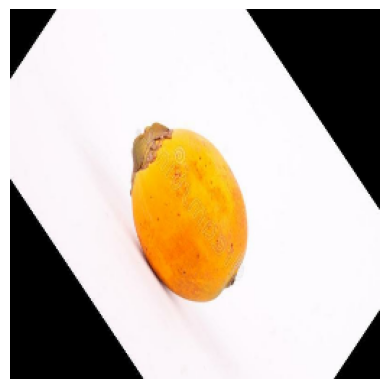

In [11]:
#visualization of data
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    # plt.imshow is used to visualize the image
    #convert the image_bacth from tensor to numpy for visualzation
    # and convert it into float to int
    #randomly selecting the images
    plt.axis("off") # hide x and y-axis

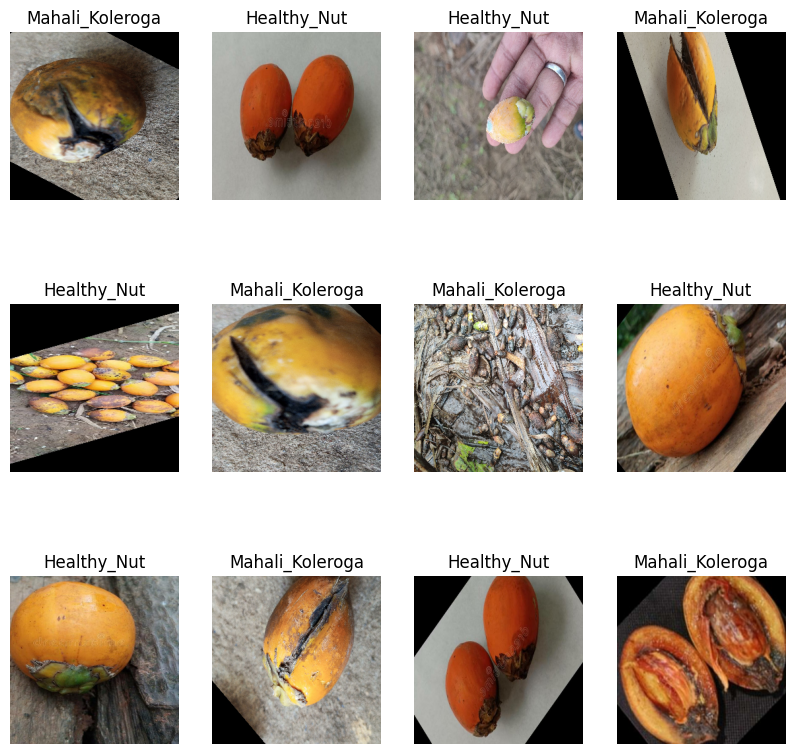

In [ ]:
#visualization of data
 #increase the size of the images
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12): # displaying the 12 images
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])# assigning the title by using index no. of the dataset
        plt.axis("off") # hide x and y-axis
        


In [13]:
len(dataset)

144

In [14]:
68*32 # 32 because each data is of 32 batch

2176

In [15]:
# split the data into train and test
# 80% for training 
# 20 % for testing(in which 10 % for validation, 10% for test )
# validation is used during the training process when we run epochs

#lets try with 50 epochs
EPOCHS = 50

In [16]:
train_size = 0.8
len(dataset) * train_size


115.2

In [17]:
#dataset.take(54) takes the first 54 sample
train_ds = dataset.take(54)
len(train_ds)

54

In [18]:
test_ds = dataset.skip(54) # skipping the first 54 dataset and getting the next 54 dataset
len(test_ds)

90

In [19]:
#  10 % for validation
val_size = 0.1
len(dataset) * val_size

14.4

In [20]:
test_ds = test_ds.skip(6)
len(test_ds) #actual test dataset

84

In [21]:
# putting all the above code in a proper function
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1,shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        #randomly shuffling the datset 
        ds = ds.shuffle(shuffle_size, seed = 12) #seed is because we should not get same images, seed may be anynumber
        
        train_size = int(train_split * ds_size) #convert into integer
        val_size = int(val_split *  ds_size)
        
        train_ds = ds.take(train_size)
        
        val_ds = ds.skip(train_size).take(val_size) # first skip and then take the dataset
        test_ds = ds.skip(train_size).take(val_size)
        
        return train_ds, val_ds, test_ds
        

In [22]:
train_ds, val_ds, test_ds =  get_dataset_partitions_tf(dataset)
len(train_ds)


115

In [23]:
len(val_ds)

14

In [24]:
len(test_ds)

14

In [25]:
# train dataset = train_ds
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory
# prefetch will load next batch of the images, when current batch is bussy

#validation dataset = val_ds
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory
#test dataset = test_ds
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory


In [26]:
#resizing and rescaling the images
resizing_and_rescaling = tf.keras.Sequential([
    #resizing and rescaling each image layer
    # .experimental is an API
    
    # layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [27]:
data_augumentation =  tf.keras.Sequential([
    # concert the image into horizontal and vertical (landsacpe and portrait )
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [29]:
#Model Building CNN
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3 # our no. of classes(folders) are three

model = models.Sequential([
    resizing_and_rescaling, # first resizing_and_rescaling
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
     # trial and error with neurons 32 and 64
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
     #after pooling we should do flatten the model
    layers.Flatten(),
    
      #adding dense layer of 64 neurons
    layers.Dense(64, activation='relu'),
    
    #     normalize the classes
    # softmax normalize the probability of the classes
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [31]:
from keras import utils as np_utils

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)
# here we get the validation accuracy and accuracy of the model at each train
# accuracy will be keep on increasing as we train

Epoch 1/5
115/115 [==============================] - 310s 2s/step - loss: 0.5910 - accuracy: 0.7598 - val_loss: 0.4806 - val_accuracy: 0.8415
Epoch 2/5
115/115 [==============================] - 221s 2s/step - loss: 0.2991 - accuracy: 0.8952 - val_loss: 0.2534 - val_accuracy: 0.9107
Epoch 3/5
115/115 [==============================] - 220s 2s/step - loss: 0.2751 - accuracy: 0.9017 - val_loss: 0.3393 - val_accuracy: 0.8728
Epoch 4/5
115/115 [==============================] - 221s 2s/step - loss: 0.1412 - accuracy: 0.9523 - val_loss: 0.1417 - val_accuracy: 0.9509
Epoch 5/5
115/115 [==============================] - 221s 2s/step - loss: 0.0942 - accuracy: 0.9690 - val_loss: 0.0530 - val_accuracy: 0.9888


In [34]:
#  model compling using optimizer, loss and metrics
# model.compile(
#     optimizer = 'adam',
#      loss = tf.keras.utils.np_utils.to_categorical(from_logits = False),
#     loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#     metrics = ['accuracy']
# )

In [35]:
# history = model.fit(
#     train_ds,
#     epochs = EPOCHS,
#     batch_size = BATCH_SIZE,
#     verbose = 1,
#     validation_data = val_ds
# )

In [36]:
score = model.evaluate(test_ds)
score

14/14 [==============================] - 38s 295ms/step - loss: 0.0526 - accuracy: 0.9844


[0.05259612202644348, 0.984375]

In [37]:
history

In [38]:
history.params # parameters

{'verbose': 1, 'epochs': 5, 'steps': 115}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
history.history['accuracy']

[0.7598039507865906,
 0.8951525092124939,
 0.9016884565353394,
 0.9523420333862305,
 0.9689542651176453]

In [41]:
len(history.history['accuracy'])

5

In [42]:
# visualize the train and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

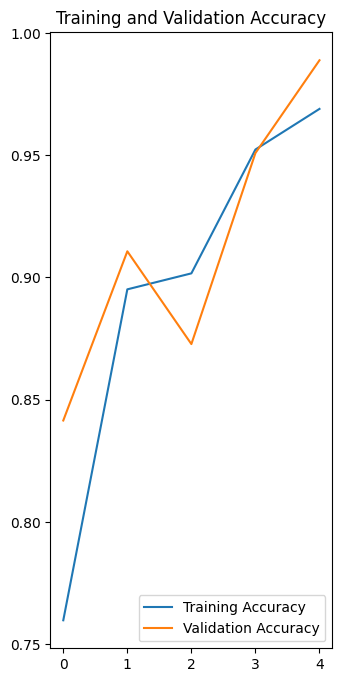

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#graphs shows the increase in accuracy

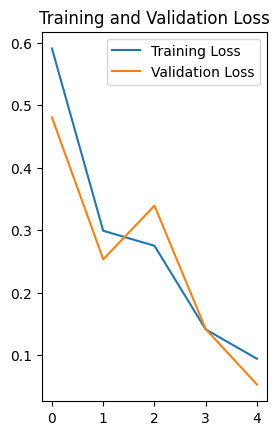

In [46]:
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# graphs shows the loss

first image to predict
actual label: Mahali_Koleroga
predicted label: Mahali_Koleroga


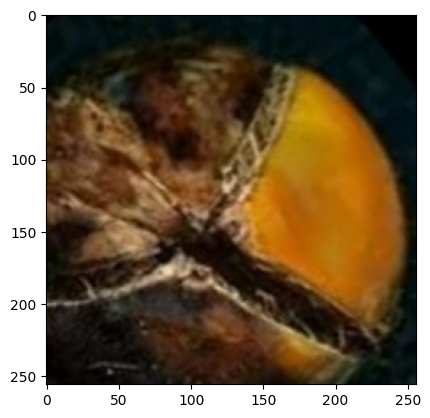

In [47]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [49]:
# function which takes model and image as input and tells predict class and confidence
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

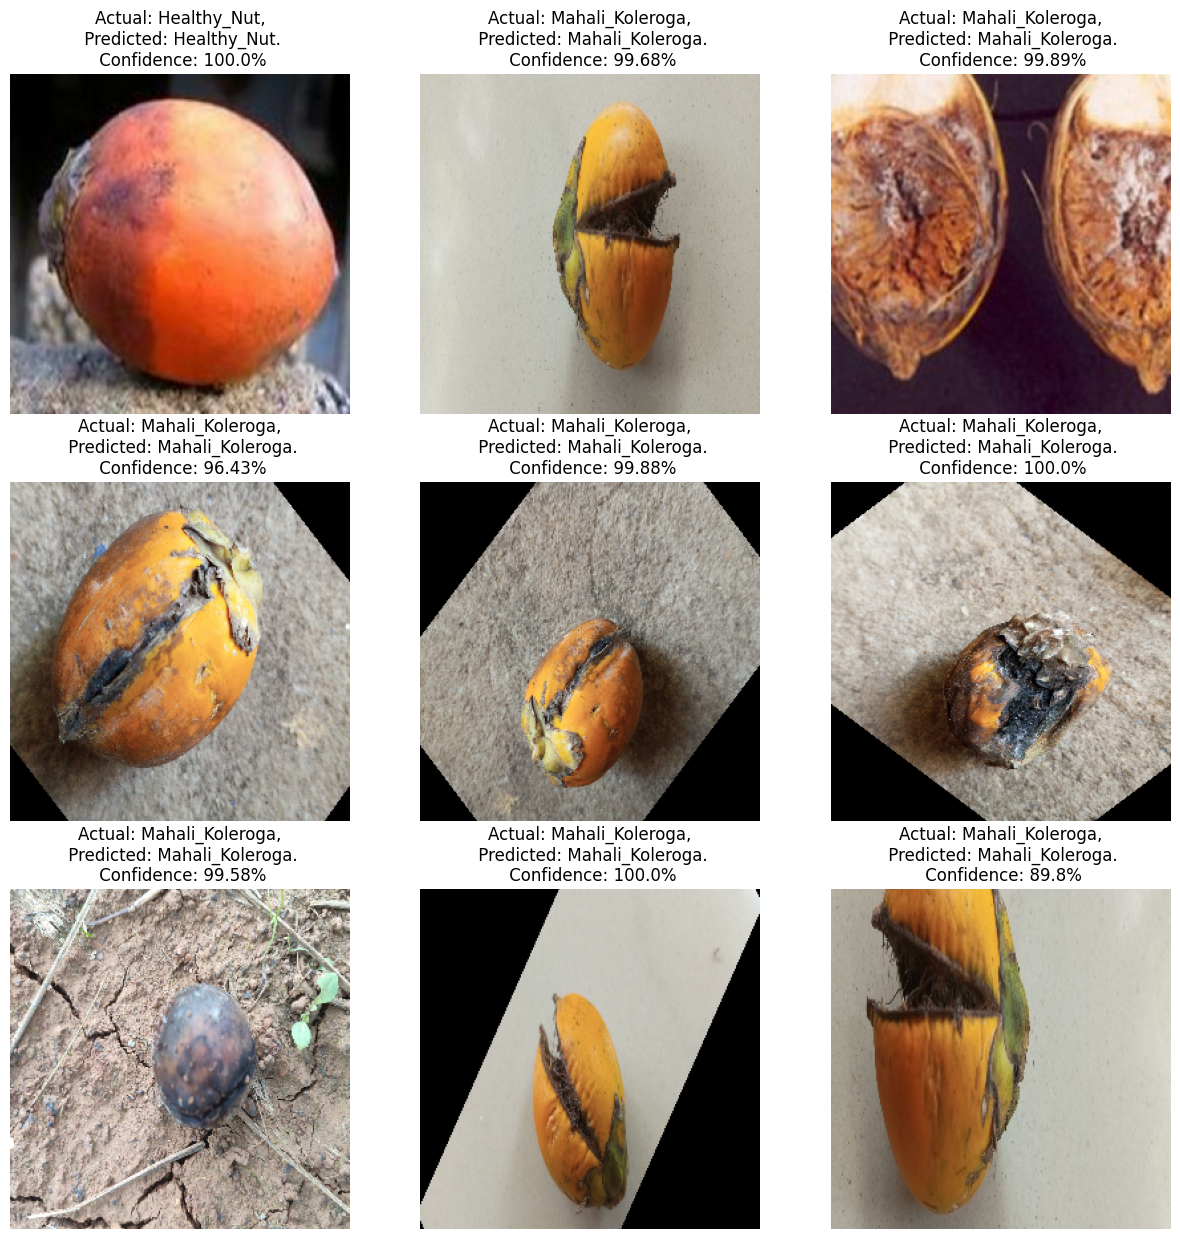

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [53]:
# save the model
import os
# automatically create the version of the model
model_version=max([int(i) for i in os.listdir(r"C:\Users\Admin\Desktop") if i.isdigit()] + [0])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


In [54]:
import os
os.chdir(r'C:\Users\Admin\Desktop\potato-disease-classification-main\training\models')

In [55]:
model.save("../arecanut.h5")